170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


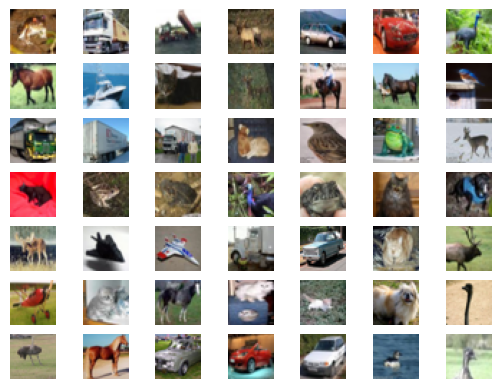

In [1]:
#example of loading and plotting the cifar10 dataset
from keras.datasets.cifar10 import load_data
from matplotlib import pyplot

#load the images into memory
(trainX, trainy), (testX, testy) = load_data()

#plot images from the training dataset
for i in range(49):
  #define subplot
  pyplot.subplot(7,7,1+i)
  #turn off axis
  pyplot.axis('off')
  #plot raw pixel data
  pyplot.imshow(trainX[i])
#pyplot.show()

In [2]:
#example of defining the discriminator model

from keras.models import Sequential
from keras.optimizers import Adam
from keras.layers import Dense, Conv2D, Flatten, Dropout, LeakyReLU
from keras.utils import plot_model
import numpy as np

In [6]:
def define_discriminator(in_shape=(32,32,3)):
    model = Sequential()
    # normal
    model.add(Conv2D(64, (3,3), padding='same', input_shape=in_shape))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(128, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # downsample
    model.add(Conv2D(256, (3,3), strides=(2,2), padding='same'))
    model.add(LeakyReLU(alpha=0.2))
    # classifier
    model.add(Flatten())
    model.add(Dropout(0.4))
    model.add(Dense(1, activation='sigmoid'))
    # compile model
    opt = Adam(learning_rate=0.0002, beta_1=0.5)
    model.compile(loss='binary_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d_12 (Conv2D)                   │ (None, 32, 32, 64)          │           1,792 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_12 (LeakyReLU)           │ (None, 32, 32, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_13 (Conv2D)                   │ (None, 16, 16, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_13 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_14 (Conv2D)                   │ (None, 8, 8, 128)           │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_14 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_15 (Conv2D)                   │ (None, 4, 4, 256)           │         295,168 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_15 (LeakyReLU)           │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_3 (Flatten)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │           4,097 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 522,497 (1.99 MB)

 Trainable params: 522,497 (1.99 MB)

 Non-trainable params: 0 (0.00 B)

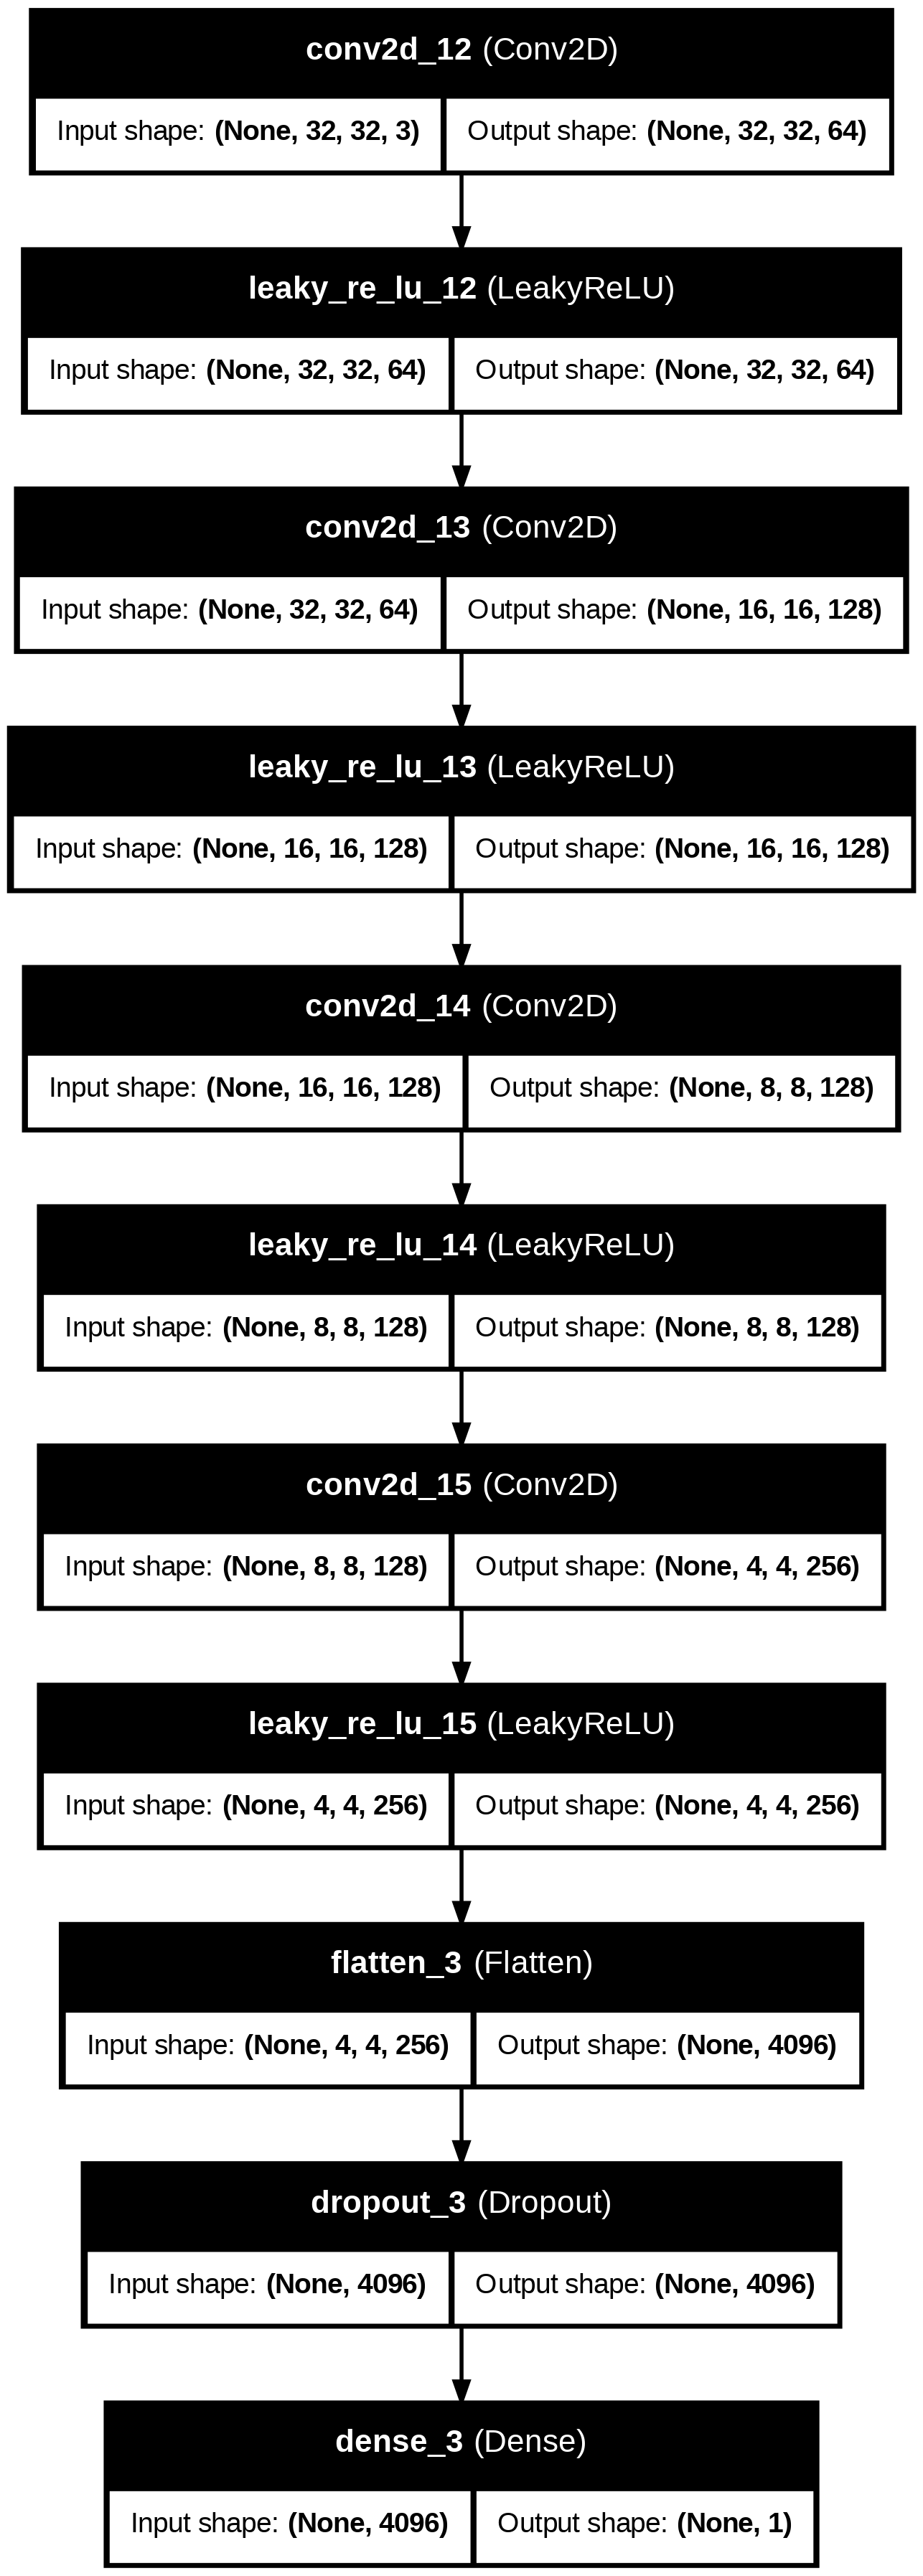

In [8]:
#define model
model = define_discriminator()
#summarize the model
model.summary()
#plot the model
plot_model(model, to_file = 'discriminator_plot.png', show_shapes = True, show_layer_names = True)

In [9]:
#Function to load the dataset and scale it
#load and prepare cifar10 training images
def load_real_samples():
  #load cifar10 dataset
  (trainX, _), (_, _) = load_data()
  #convert from unsigned ints to floats
  X = trainX.astype('float32')
  #scale from [0,255] to [-1,1]
  X = (X-127.5)/127.5
  return X

In [10]:
X = load_real_samples()
X.shape

(50000, 32, 32, 3)

In [11]:
#select real samples
def generate_real_samples(dataset, n_samples):
  #choose random instances
  ix = np.random.randint(0, dataset.shape[0], n_samples)
  #retrieve selected images
  X = dataset[ix]
  #generate 'real' class labels (1)
  y = np.ones((n_samples, 1))
  return X, y

In [12]:
X, y = generate_real_samples(X, 64)
print(X.shape)
print(y.shape)
print(y)

(64, 32, 32, 3)
(64, 1)
[[1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]]


In [13]:
#generate n fake samples with class labels
def generate_fake_samples(n_samples):
  #generate uniform random numbers in [0, 1]
  X = np.random.rand(32*32*3*n_samples)
  #update to have the range [-1, 1]
  X = -1 + X * 2
  #reshape into a batch of color images
  X = X.reshape((n_samples, 32, 32, 3))
  #generate 'fake' class labels(0)
  y = np.zeros((n_samples, 1))
  return X, y

In [14]:
#train discriminator model temporarily
def train_discriminator(model, dataset, n_iter = 20, n_batch = 128):
  half_batch = int(n_batch/2)
  #manually enumerate epochs
  for i in range(n_iter):
    #get randomly selected 'real' samples
    X_real, y_real = generate_real_samples(dataset, half_batch)
    #update discriminator on real samples
    _, real_acc = model.train_on_batch(X_real, y_real)
    #generate fake samples
    X_fake, y_fake = generate_fake_samples(half_batch)
    #update discriminator on fake samples
    _, fake_acc = model.train_on_batch(X_fake, y_fake)
    #summarize performance
    print('>%d real=%.0f%% fake=%.0f%%' % (i+1, real_acc*100, fake_acc*100))

In [15]:
#Example Training

#define the discrimintor model
model = define_discriminator()
#load image data
dataset = load_real_samples()
#fit the model
train_discriminator(model, dataset )

>1 real=50% fake=25%
>2 real=47% fake=38%


>3 real=49% fake=49%
>4 real=56% fake=60%
>5 real=64% fake=68%
>6 real=70% fake=72%
>7 real=72% fake=74%
>8 real=74% fake=76%
>9 real=76% fake=77%
>10 real=78% fake=79%
>11 real=80% fake=81%
>12 real=81% fake=82%
>13 real=83% fake=83%
>14 real=84% fake=84%
>15 real=85% fake=85%
>16 real=86% fake=86%
>17 real=87% fake=87%
>18 real=87% fake=88%
>19 real=88% fake=88%
>20 real=89% fake=89%


In [16]:
from keras.models import Sequential
from keras.layers import Dense, Reshape, Conv2D, Conv2DTranspose, LeakyReLU
from keras.utils import plot_model


In [17]:
#define the standalone generator model
def define_generator(latent_dim):
  model = Sequential()
  #foundation for 4X4 image
  n_nodes = 256 * 4 * 4
  model.add(Dense(n_nodes, input_dim = latent_dim))
  model.add(LeakyReLU(alpha = 0.2))
  model.add(Reshape((4,4,256)))
  #upsample to 8X8
  model.add(Conv2DTranspose(128, (4, 4), strides = (2, 2), padding = 'same'))
  model.add(LeakyReLU(alpha = 0.2))
  #upsample to 16X16
  model.add(Conv2DTranspose(128, (4, 4), strides = (2,2), padding = 'same'))
  model.add(LeakyReLU(alpha = 0.2))
  #upsample to 32X32
  model.add(Conv2DTranspose(128, (4, 4), strides = (2,2), padding = 'same' ))
  model.add(LeakyReLU(alpha = 0.2))
  #output layer
  model.add(Conv2D(3, (3,3), activation = 'tanh', padding = 'same'))
  return model

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                      │ (None, 4096)                │         413,696 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_20 (LeakyReLU)           │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ reshape (Reshape)                    │ (None, 4, 4, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose (Conv2DTranspose)   │ (None, 8, 8, 128)           │         524,416 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_21 (LeakyReLU)           │ (None, 8, 8, 128)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_1 (Conv2DTranspose) │ (None, 16, 16, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_22 (LeakyReLU)           │ (None, 16, 16, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_transpose_2 (Conv2DTranspose) │ (None, 32, 32, 128)         │         262,272 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ leaky_re_lu_23 (LeakyReLU)           │ (None, 32, 32, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_20 (Conv2D)                   │ (None, 32, 32, 3)           │           3,459 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,466,115 (5.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 0 (0.00 B)

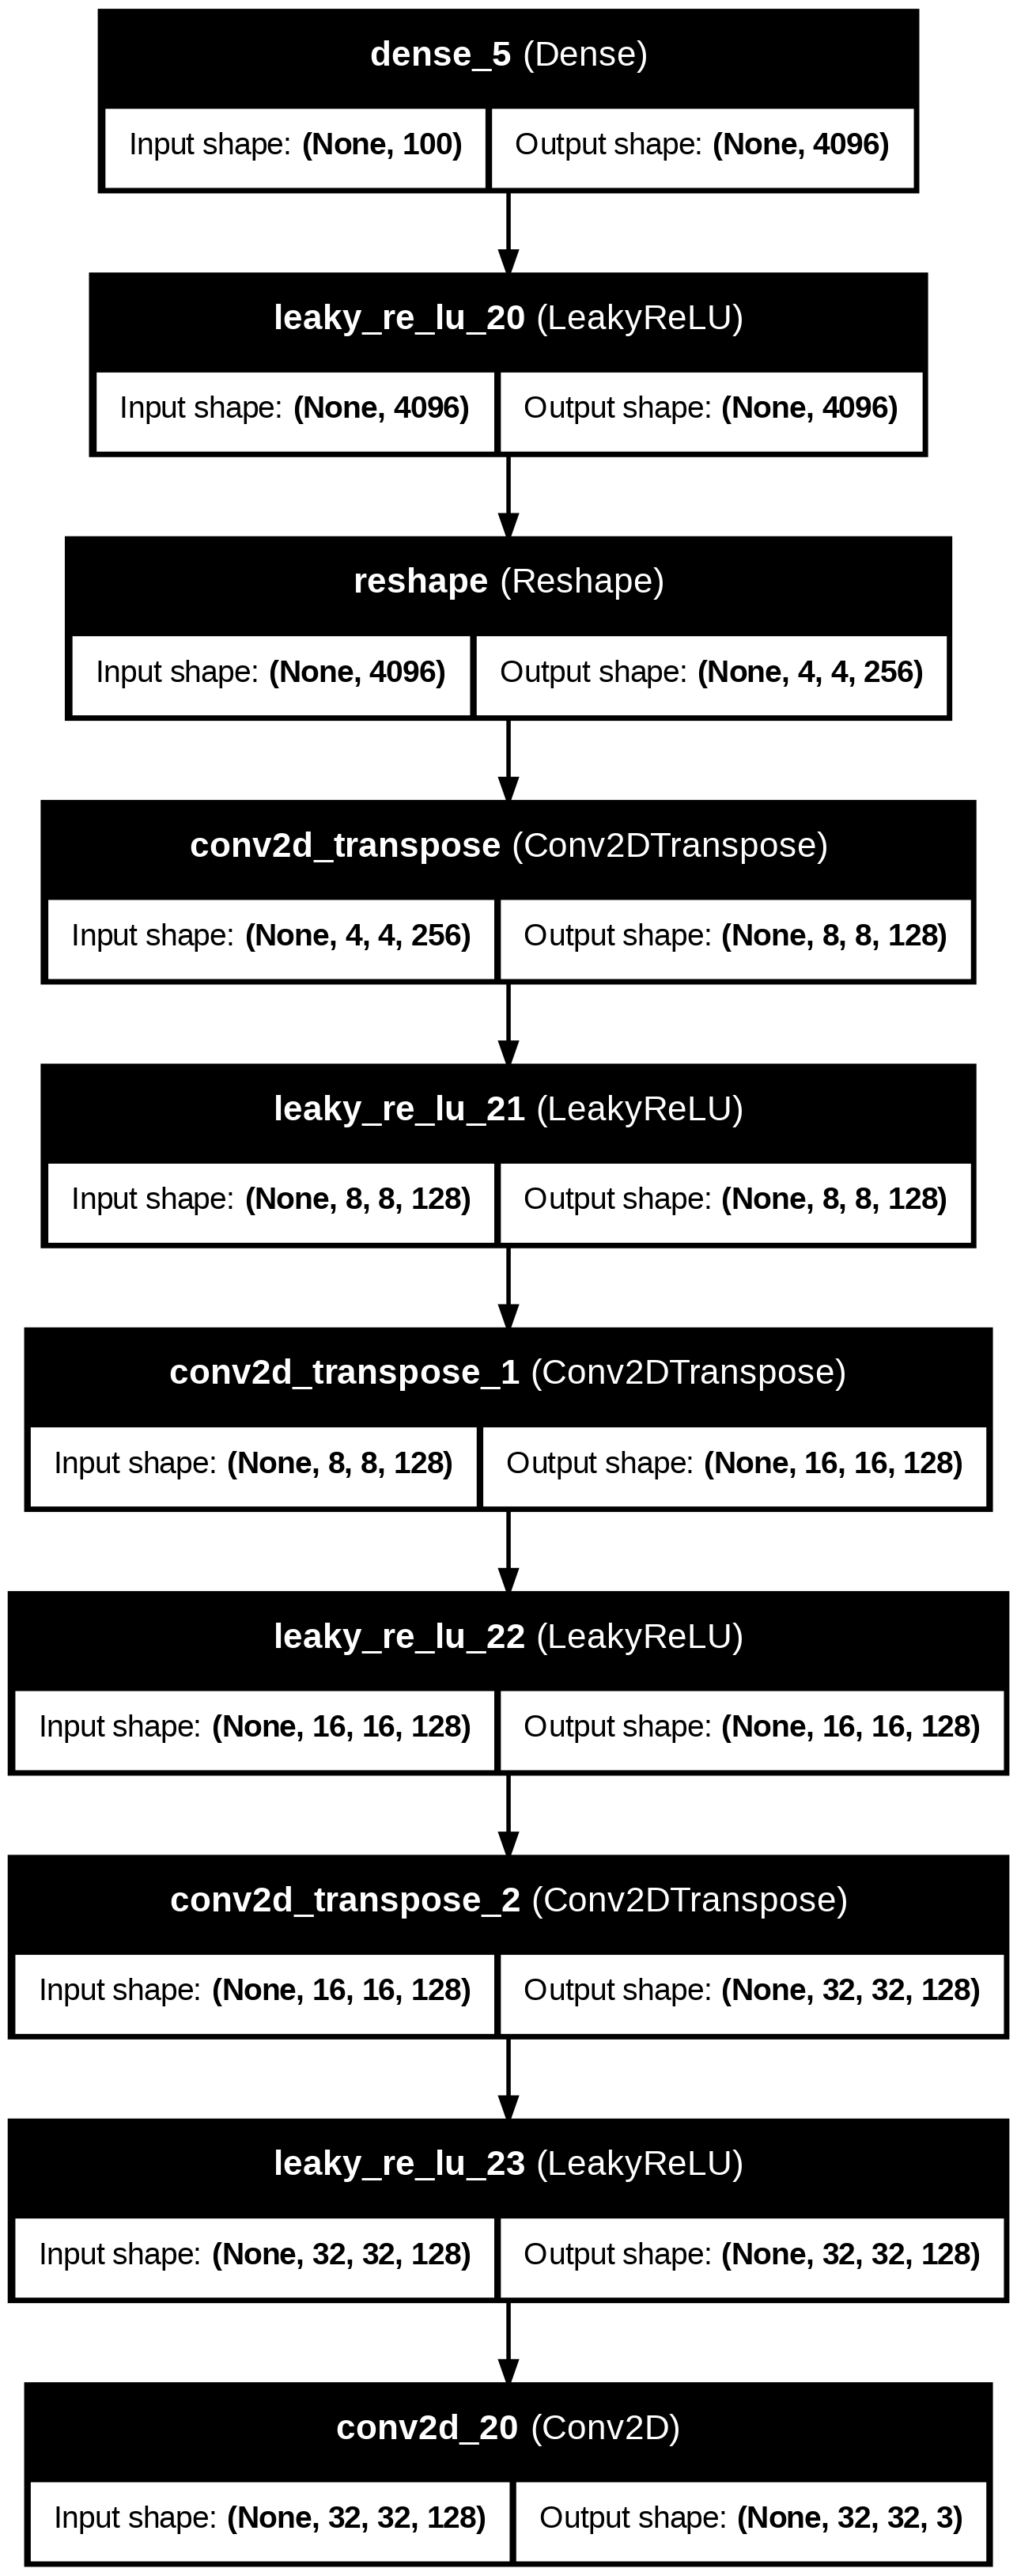

In [18]:
#define the size of the latent space
latent_dim = 100
#define the generator model
model = define_generator(latent_dim)
#summarize the model
model.summary()
#plot the model
plot_model(model, to_file = 'generator_plot.png', show_shapes = True, show_layer_names = True)

In [19]:
#generate points in latent space as input for the generator
def generate_latent_points(latent_dim, n_samples):
  #generate points in the latent space
  x_input = np.random.randn(latent_dim * n_samples)
  #reshape into a batch of inputs for the network
  x_input = x_input.reshape(n_samples, latent_dim)
  return x_input

In [20]:
#use the generator to generate n fake examples, with class labels
def generate_fake_samples(g_model, latent_dim, n_samples):
  #generate points in latent space
  x_input = generate_latent_points(latent_dim, n_samples)
  #predict outputs
  X = g_model.predict(x_input)
  #create fake class labels (0)
  y = np.zeros((n_samples, 1))
  return X, y

2/2 ━━━━━━━━━━━━━━━━━━━━ 1s 207ms/step


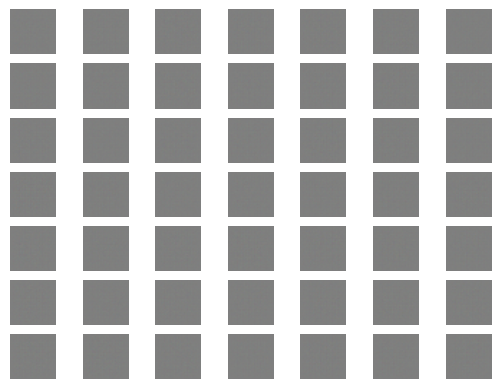

In [21]:
#size of the latent space
latent_dim = 100
#define the descriminator model
model = define_generator(latent_dim)
#generate samples
n_samples = 49
X, _ = generate_fake_samples(model, latent_dim, n_samples)
#scale pixel values from [-1,1] to [0,1]
X = (X+1)/2.0
#plot the generated samples
for i in range(n_samples):
  #define subplot
  pyplot.subplot(7, 7, 1 + i)
  #turn off axis labels
  pyplot.axis('off')
  #plot single image
  pyplot.imshow(X[i])
#show the figure
pyplot.show()

In [25]:
#define the combined generator and discriminator model, for updating the generator
def define_gan(g_model, d_model):
  #make weights in the discriminator not trainable
  d_model.trainable = False
  #connect them
  model = Sequential()
  #add generator
  model.add(g_model)
  #add the discriminator
  model.add(d_model)
  #compile model
  opt = Adam(learning_rate = 0.0002, beta_1 = 0.5)
  model.compile(loss = 'binary_crossentropy', optimizer = opt)
  return model

Model: "sequential_21"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ sequential_20 (Sequential)           │ (None, 32, 32, 3)           │       1,466,115 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ sequential_19 (Sequential)           │ (None, 1)                   │         522,497 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 1,988,612 (7.59 MB)

 Trainable params: 1,466,115 (5.59 MB)

 Non-trainable params: 522,497 (1.99 MB)

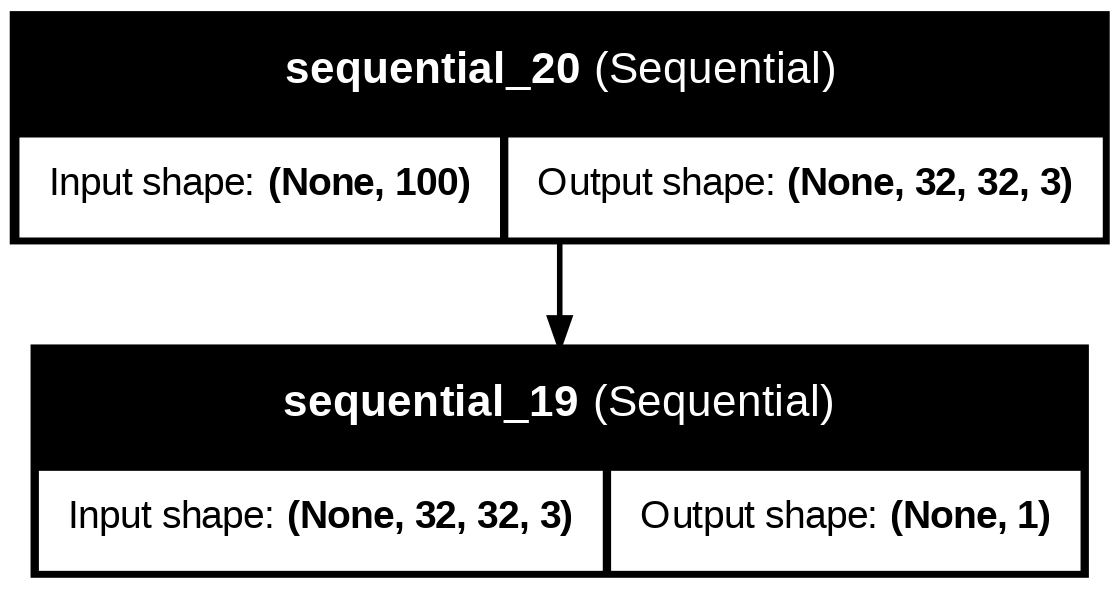

In [28]:
#size of the latent space
latent_dim = 100
#create the discriminator
d_model = define_discriminator()
#create the generator
g_model = define_generator(latent_dim)
#create the gan
gan_model = define_gan(g_model, d_model)
gan_model.build(input_shape=(None, latent_dim))

#summarize gan model
gan_model.summary()
#plot gan model
plot_model(gan_model, to_file = 'gan_plot.png', show_shapes = True, show_layer_names = True)

In [29]:
#train the generator and discriminator
def train(g_model, gan_model, dataset, latent_dim, n_epochs = 200, n_batch = 128):
  bat_per_epo = int(dataset.shape[0]/n_batch)
  half_batch = int(n_batch/2)
  #manually enumerate epochs
  for i in range(n_epochs):
    #enumerate batches over the training set
    for j in range(bat_per_epo):
      #get randomly selected real samples
      X_real, y_real = generate_real_samples(dataset, half_batch)
      #update the discriminator model weights
      d_loss1, _ = d_model.train_on_batch(X_real, y_real)
      #generate 'fake' samples
      X_fake, y_fake = generate_fake_samples(g_model, latent_dim, half_batch)
      #update discriminator model weights
      d_loss2, _ = d_model.train_on_batch(X_fake, y_fake)
      #prepare points in latent space as input for the generator
      X_gan = generate_latent_points(latent_dim, n_batch)
      #create inverted labels for the fake samples
      y_gan = np.ones((n_batch, 1))
      #update the generator via the discriminator's error
      g_loss = gan_model.train_on_batch(X_gan, y_gan)
      #summarize loss on this batch
      print('>%d, %d/%d, d1=%.3f, d2=%.3f g=%.3f' %
            (i+1, j+1, bat_per_epo, d_loss1, d_loss2, g_loss))
   #evaluate the model performance, sometimes
    if (i+1)%10 == 0:
      summarize_performance(i, g_model, d_model, dataset, latent_dim)




In [30]:
#evaluate the discriminator, plot generated images, save generator model
def summarize_performance(epoch, g_model, d_model, dataset, latent_dim, n_samples = 150):
  #prepare real samples
  X_real, y_real = generate_real_samples(data_set, n_samples)
  #evaluate discriminator on real examples
  _, acc_real = d_model.evaluate(X_real, y_real, verbose = 0)
  #prepare fake samples
  x_fake, y_fake = generate_real_samples(g_model, latent_dim, n_samples)
  #evaluate discriminator on fake samples
  _, acc_fake = d_model.evaluate(x_fake, y_fake, verbose = 0)
  ##summarize discriminator peformance
  print('>Accuracy real: %.0f%%, fake: %.of%%' % (acc_real*100, acc_fake*100))
  #save plot
  save_plot(x_fake, epoch)
  #save the generator model tile file
  filename = 'generator_model_%03d.h5' % (epoch + 1)
  g_model.save(filename)

In [31]:
#create and save a plot of generated images


def save_plot(examples, epoch, n = 7):
  #scale from [-1, 1] to [0,1]
  examples = (examples + 1)/2.0
  #plot images
  for i in range(n * n):
    #define subplot
    pyplot.subplot(n, n, 1 + i)
    #turn off axis
    pyplot.axis('off')
    #plot raw pixel data
    pyplot.imshow(examples[i])
    # save plot to file
    filename = 'generates_plot_e%03d.png' % (epoch + 1)
    pyplot.savefig(filename)
    pyplot.close()